In [1]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('/home/hamonme/Final Project/merged_cleaned.csv')
df.head(10)

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters
0,Arabica,Ethiopia,300,METAD Agricultural Development plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,...,10.0,8.58,89.92,0.12,0,0.0,Green,1,1950.0,2200.0
1,Arabica,Ethiopia,300,METAD Agricultural Development plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,...,10.0,8.58,88.83,0.12,0,0.0,Green,2,1950.0,2200.0
2,Arabica,Ethiopia,50,METAD Agricultural Development plc,Other,Natural / Dry,8.08,8.58,8.50,8.50,...,10.0,8.50,88.25,0.10,0,0.0,Green,4,1795.0,1850.0
3,Arabica,China,3,Yunnan Coffee Exchange,Catimor,Washed / Wet,8.42,8.25,8.08,8.17,...,10.0,8.42,87.25,0.10,0,0.0,Green,0,1450.0,1450.0
4,Arabica,United States,10,Almacafé,Other,Washed / Wet,8.00,8.25,8.08,8.50,...,10.0,8.17,87.25,0.00,0,0.0,None,0,2019.0,2019.0
5,Arabica,Costa Rica,250,Specialty Coffee Association,Caturra,Washed / Wet,8.08,8.25,8.00,8.17,...,10.0,8.33,87.17,0.11,0,0.0,Green,2,1300.0,1300.0
6,Arabica,Mexico,14,AMECAFE,Other,Washed / Wet,8.17,8.25,8.17,8.00,...,10.0,8.58,87.17,0.13,0,0.0,Green,0,1320.0,1320.0
7,Arabica,Brazil,3,NUCOFFEE,Bourbon,Natural / Dry,8.50,8.50,8.00,8.00,...,10.0,7.92,86.92,0.12,0,0.0,Green,2,1250.0,1250.0
8,Arabica,Uganda,100,Uganda Coffee Development Authority,SL14,Washed / Wet,8.42,8.17,8.17,8.17,...,10.0,8.17,86.83,0.12,0,0.0,Green,1,1950.0,1950.0
9,Arabica,Taiwan,20,Specialty Coffee Association,Sumatra,Pulped natural / honey,8.00,8.00,8.00,8.25,...,10.0,8.17,86.58,0.00,0,0.0,Green,0,1200.0,1200.0


In [3]:
df.columns

Index(['Species', 'Country.of.Origin', 'Number.of.Bags', 'In.Country.Partner',
       'Variety', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Color', 'Category.Two.Defects', 'altitude_low_meters',
       'altitude_high_meters'],
      dtype='object')

In [25]:
mean = df['Total.Cup.Points'].mean()
print(mean)

err = (df['Total.Cup.Points']-mean)**2
mse = err.sum()/len(y)
mse

80.17229246487864


13.074459176277832

## Baseline MSE for regression is 13.07

array([[<AxesSubplot:title={'center':'Total.Cup.Points'}>]], dtype=object)

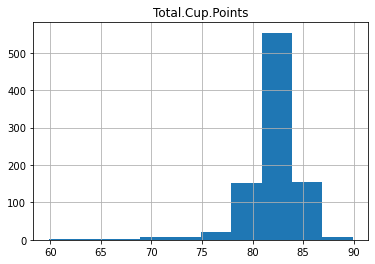

In [5]:
df.hist('Total.Cup.Points')

# Binary Classification

In [6]:
# bin into two classes
bins = [0,80,100]
classes = ['very good','excellent']
df['quality'] =  pd.cut(df['Total.Cup.Points'],bins,labels=classes)


In [7]:
#pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [8]:
X = df.drop('Total.Cup.Points',axis=1)
X = df.drop('quality',axis=1)
#X = df.select_dtypes(include=np.number)
y = df['quality']
X.head()

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters
0,Arabica,Ethiopia,300,METAD Agricultural Development plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,...,10.0,8.58,89.92,0.12,0,0.0,Green,1,1950.0,2200.0
1,Arabica,Ethiopia,300,METAD Agricultural Development plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,...,10.0,8.58,88.83,0.12,0,0.0,Green,2,1950.0,2200.0
2,Arabica,Ethiopia,50,METAD Agricultural Development plc,Other,Natural / Dry,8.08,8.58,8.50,8.50,...,10.0,8.50,88.25,0.10,0,0.0,Green,4,1795.0,1850.0
3,Arabica,China,3,Yunnan Coffee Exchange,Catimor,Washed / Wet,8.42,8.25,8.08,8.17,...,10.0,8.42,87.25,0.10,0,0.0,Green,0,1450.0,1450.0
4,Arabica,United States,10,Almacafé,Other,Washed / Wet,8.00,8.25,8.08,8.50,...,10.0,8.17,87.25,0.00,0,0.0,None,0,2019.0,2019.0


In [12]:
oversample = RandomOverSampler()
[X,y] = oversample.fit_resample(X,y)

<AxesSubplot:>

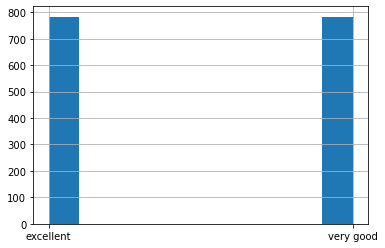

In [13]:
y.hist()

In [17]:
y.value_counts()

very good    783
excellent    783
Name: quality, dtype: int64

In [23]:
df = pd.concat([X,y],axis=1)
df.to_csv('./categorical_binary.csv', index=False)

## Now that the data is balanced, the baseline for binary classification is 0.5.

,Species,Country.of.Origin,Number.of.Bags,In.Country.Partner,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,quality
0,Arabica,Ethiopia,300,METAD Agricultural Development plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,...,8.58,89.92,0.12,0,0.0,Green,1,1950.0,2200.0,excellent
1,Arabica,Ethiopia,300,METAD Agricultural Development plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,...,8.58,88.83,0.12,0,0.0,Green,2,1950.0,2200.0,excellent
2,Arabica,Ethiopia,50,METAD Agricultural Development plc,Other,Natural / Dry,8.08,8.58,8.50,8.50,...,8.50,88.25,0.10,0,0.0,Green,4,1795.0,1850.0,excellent
3,Arabica,China,3,Yunnan Coffee Exchange,Catimor,Washed / Wet,8.42,8.25,8.08,8.17,...,8.42,87.25,0.10,0,0.0,Green,0,1450.0,1450.0,excellent
4,Arabica,United States,10,Almacafé,Other,Washed / Wet,8.00,8.25,8.08,8.50,...,8.17,87.25,0.00,0,0.0,None,0,2019.0,2019.0,excellent
